In [348]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

headers  = ['age', 'workclass', 'fnlwg', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'target']

df1 = pd.read_csv('adult.data', names=headers)

df = df1.copy()

# trim whitspaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


df.head()


,age,workclass,fnlwg,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [349]:
# Custom functions

def classify_feature(category_lists, data, feature):
    """
    Classifies features into ascending numbers starting at 1.
    NOTE: Must provide the category lists in ascending order
    
    Ex.
    
    data['feature']
    
        index    feature
        0        a
        1        c
        2        e
    
    
    >>> classify_feature(['a', 'b', 'c'], ['d', 'e', f'], 'letter')
    >>> data['feature']
    
        index    feature
        0        1
        1        1
        2        2
    
    """
    for i, category_list in enumerate(category_lists):
        category_dict = dict.fromkeys(category_list, i+1)
        df[feature].replace(category_dict, inplace=True)

In [350]:
# Graphs

# plot categories
# g = sns.FacetGrid(df, col='native_country', col_wrap=4)
# g = g.map(plt.hist, 'target')

# plot continuous variables

# plt.figure(figsize=(15,8))
# g = sns.barplot(data=df, x='age', y='target')
# g = sns.violinplot(data=df, x='age', y='target')



Turns out, these factors aren't highly correlated with salary:

- fnlwg
- education_num
- age
- race
- capital_gain
- capital_loss
- native_country

In [351]:
# Drop unnecessary variables

df.drop(columns=['fnlwg', 'education_num', 'age', 'race', 'capital_gain', 'capital_loss', 'native_country'], inplace=True)

# CLASSIFY VARIABLES

#assign 1 to <= 50K and 2 to > 50k
df['target'].replace(['<=50K', '>50K'], ['Poor', 'Rich'], inplace=True)

# break down education into 3 buckets
# 1 = Low/No Education, 2 = College, 3 = Advanced

low_edu = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college']
med_edu = ['Bachelors', 'Assoc-voc', 'Assoc-acdm']
high_edu = ['Doctorate', 'Masters', 'Prof-school']


classify_feature([low_edu, med_edu, high_edu], df, 'education')


# looks like non-married people are more likely to make less. Married people are about 50-50
# split into two categories

non_married = ['Never-married', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
               'Widowed']
married = ['Married-civ-spouse']


classify_feature([non_married, married], df, 'marital_status')

# position is correlated with salary. Classify into low and high earning jobs

low_wage_jobs = ['Adm-clerical', 'Handlers-cleaners', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv']

high_wage_jobs = ['Exec-managerial', 'Prof-specialty']

classify_feature([low_wage_jobs, high_wage_jobs], df, 'occupation')


# workclass correlates strongly with salary

low_salary_job = ['State-gov', 'Self-emp-not-inc', 'Private',
       'Local-gov', '?', 'Without-pay', 'Never-worked']
high_salary_job = ['Federal-gov', 'Self-emp-inc']

classify_feature([low_salary_job, high_salary_job], df, 'workclass')

# relationship

low_relation = ['Not-in-family', 'Own-child', 'Unmarried',
       'Other-relative']
high_relation = ['Husband', 'Wife']

classify_feature([low_relation, high_relation], df, 'relationship')

# sex

classify_feature([['Female'], ['Male']], df, 'sex')

# folks working less than 50 hours per week are making less by and large

low_hours_per_week = [i for i in range(1, 51)]
high_hours_per_week = [i for i in range(51, 100)]

classify_feature([low_hours_per_week, high_hours_per_week], df, 'hours_per_week')

Now, the data is quantified and ready to be processed by a ML algorithm

In [352]:
df.head()

,workclass,education,marital_status,occupation,relationship,sex,hours_per_week,target
0,1,2,1,1,1,2,1,Poor
1,1,2,2,2,2,2,1,Poor
2,1,1,1,1,1,2,1,Poor
3,1,1,2,1,2,2,1,Poor
4,1,2,2,2,2,1,1,Poor


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<BarContainer object of 7 artists>

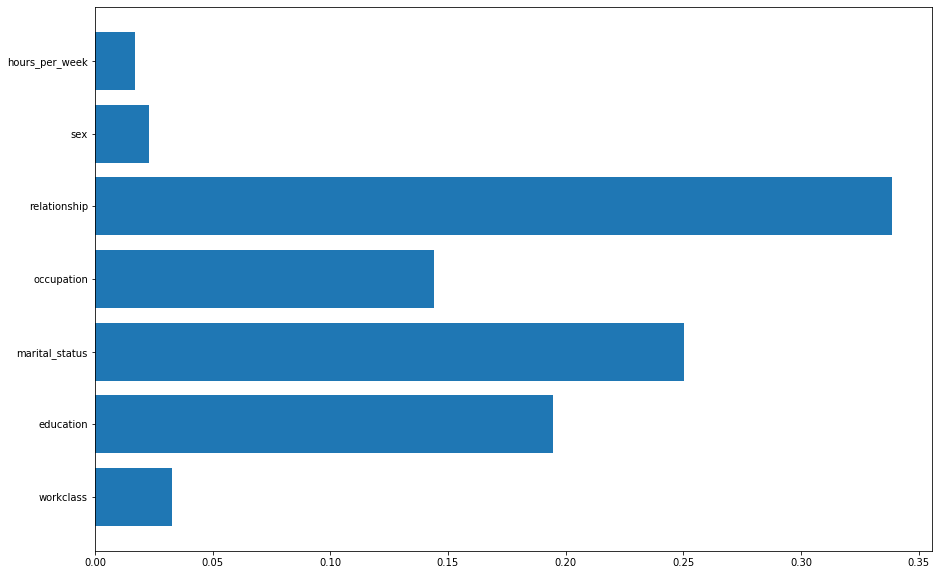

In [353]:
# initiate ML 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error


features = ['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'sex', 'hours_per_week']

y = df['target']
X = df[features]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

y = random_forest.feature_importances_

plt.figure(figsize=(15, 10))
plt.barh(features, y)

In [354]:
random_forest.score(X_test, y_test)

0.8221348728657413

## There you have it. We have a model that's 82% accurate in predicting whether a given person makes above or below 50K!